In [1]:
# font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
# import 라이브러리
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings

# 경고문 출력 방지
warnings.filterwarnings(action='ignore')

# visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 수집

In [4]:
# csv 파일 읽어오기
file_path = "/gdrive/MyDrive/HorseRacingPrediction/data/train.csv"
df = pd.read_csv(file_path)

In [5]:
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

# 데이터 탐색

In [6]:
# 데이터 확인하기
print(f'데이터셋 크기 : {df.shape}')

데이터셋 크기 : (7064, 35)


In [7]:
# 데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7064 entries, 0 to 7063
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rcDate      7064 non-null   int64  
 1   rcNo        7064 non-null   int64  
 2   chulNo      7064 non-null   int64  
 3   hrNo        7064 non-null   int64  
 4   age         7064 non-null   int64  
 5   ageCond     7064 non-null   object 
 6   budam       7064 non-null   object 
 7   chaksunT    7064 non-null   int64  
 8   chaksunY    7064 non-null   int64  
 9   chaksun_6m  7064 non-null   int64  
 10  dusu        7064 non-null   int64  
 11  ilsu        7064 non-null   int64  
 12  ord1CntT    7064 non-null   int64  
 13  ord1CntY    7064 non-null   int64  
 14  ord2CntT    7064 non-null   int64  
 15  ord2CntY    7064 non-null   int64  
 16  ord3CntT    7064 non-null   int64  
 17  ord3CntY    7064 non-null   int64  
 18  prd         7064 non-null   object 
 19  prizeCond   7064 non-null  

In [8]:
# 경주일자 컬럼 날짜형식으로 변환
from datetime import datetime

df['rcDate'] = df['rcDate'].astype(str)
# df['rcDate'] = pd.to_datetime(df['rcDate'])
df['rcDate'] = df['rcDate'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))
print(df['rcDate'])

0      2021-01-08
1      2021-01-08
2      2021-01-08
3      2021-01-08
4      2021-01-08
          ...    
7059   2021-12-26
7060   2021-12-26
7061   2021-12-26
7062   2021-12-26
7063   2021-12-26
Name: rcDate, Length: 7064, dtype: datetime64[ns]


In [9]:
# 분석하지 않을 변수 제외하기 (경기기록(초))
df = df.drop(['rcTime'], axis=1, inplace=False)

In [11]:
# 결측치 파악
df.isnull().sum().sum()

0

# 데이터 시각화(EDA)

In [12]:
# 1,2위 데이터 필터링
first_prize = df[df['ord'] == 1]
second_prize = df[df['ord'] == 2]
winner_df = pd.concat([first_prize, second_prize])
# winner_df[winner_df['rcDate'].isin(pd.date_range('2021-01-08','2021-01-14'))]



---



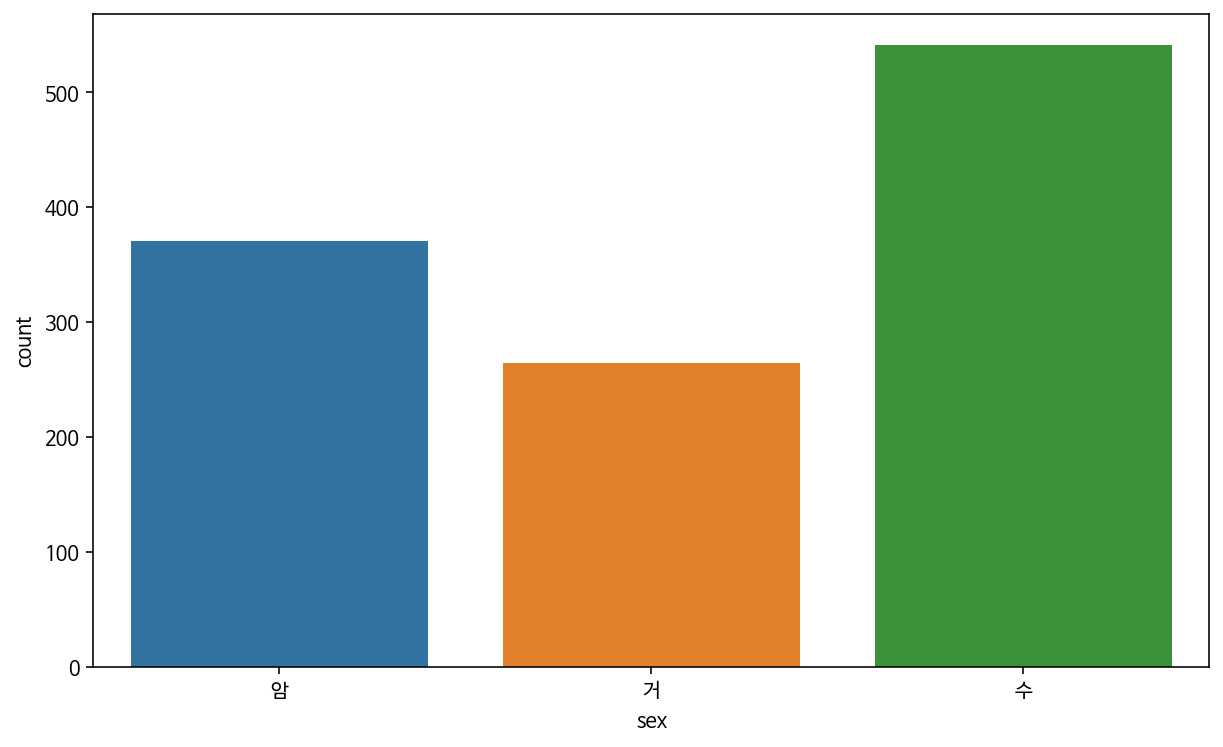

In [13]:
# 1, 2등 말의 성별
fig, ax = plt.subplots(figsize=(10,6))
fig =sns.countplot(x=winner_df['sex'])
plt.show()

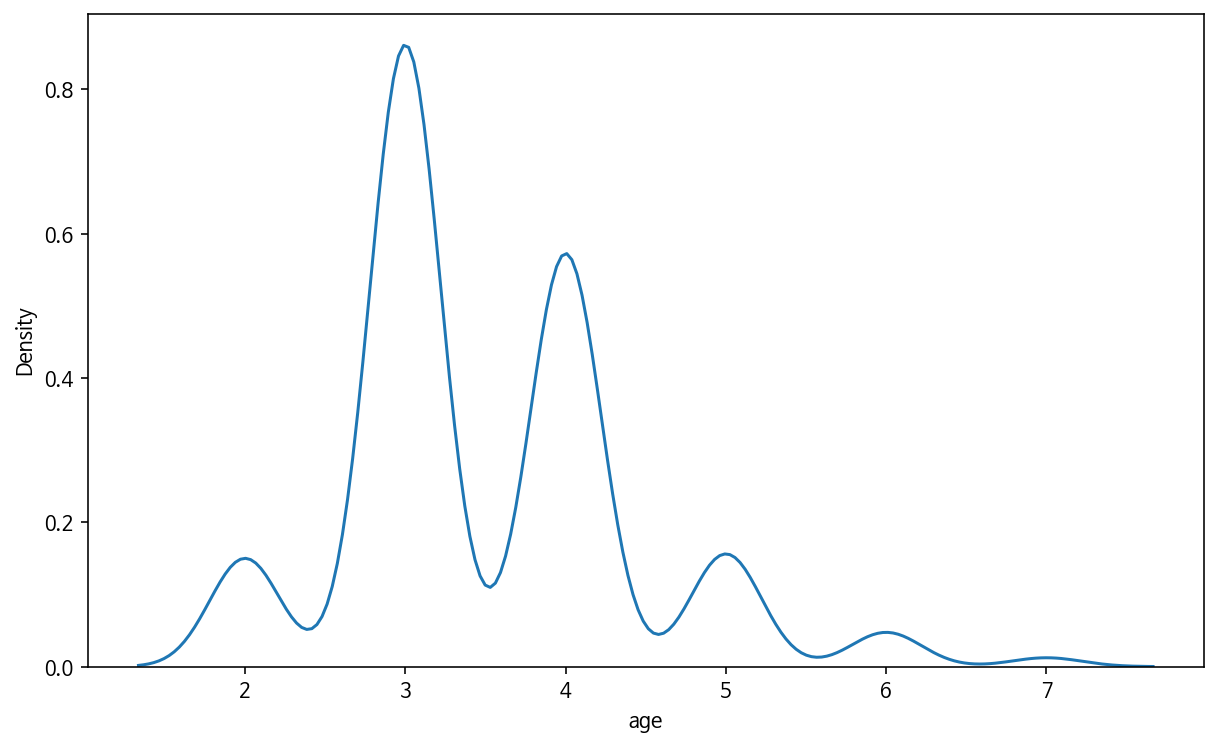

In [14]:
# 1, 2등이 가장 많은 연령 분포
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.kdeplot(x=winner_df['age'])
plt.show()

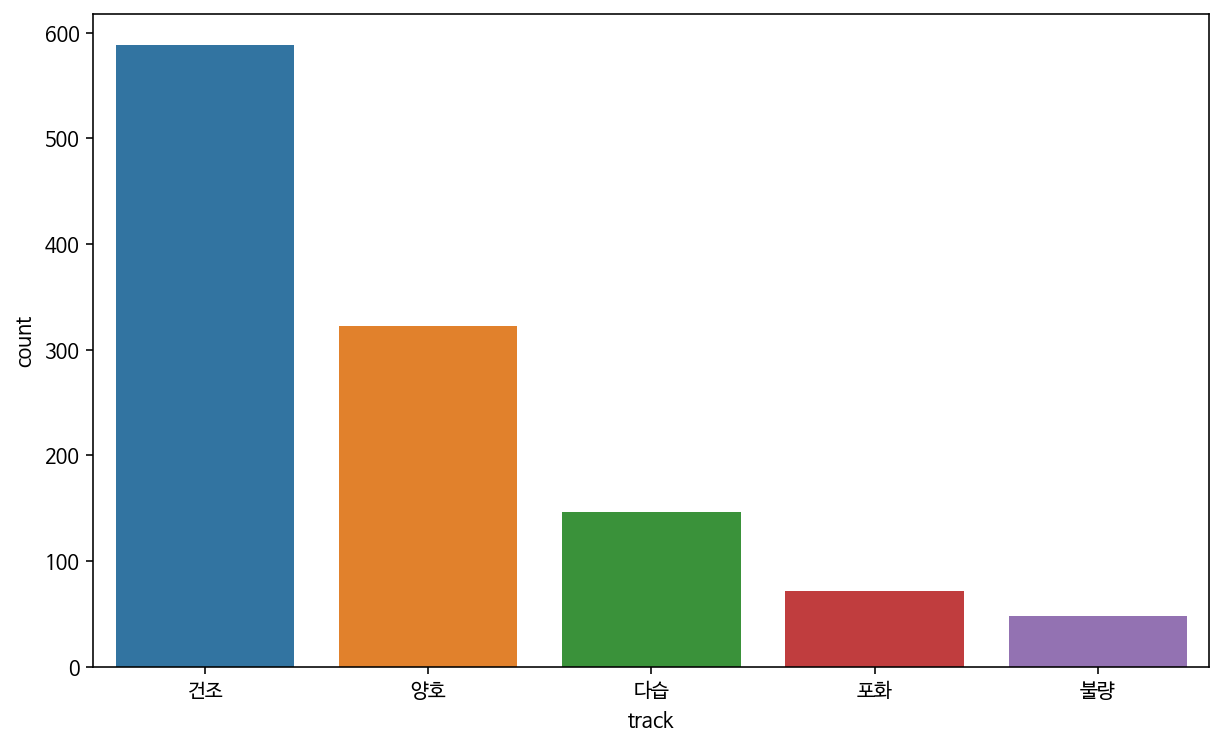

In [15]:
# 1,2등이 가장 많이 나온 트랙
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.countplot(x=winner_df['track'])
plt.show()

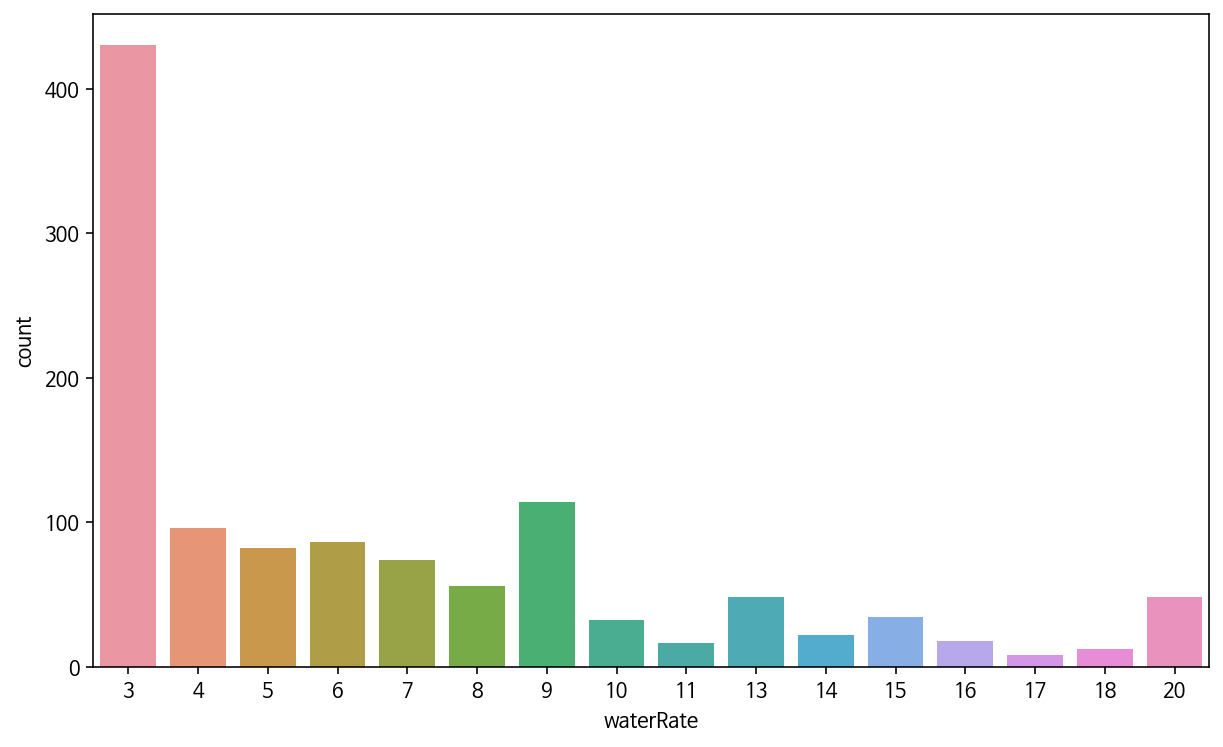

In [16]:
# 경마장 함수율
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.countplot(x=winner_df['waterRate'])
plt.show()

- 트랙상태와 연관이 있어보인다

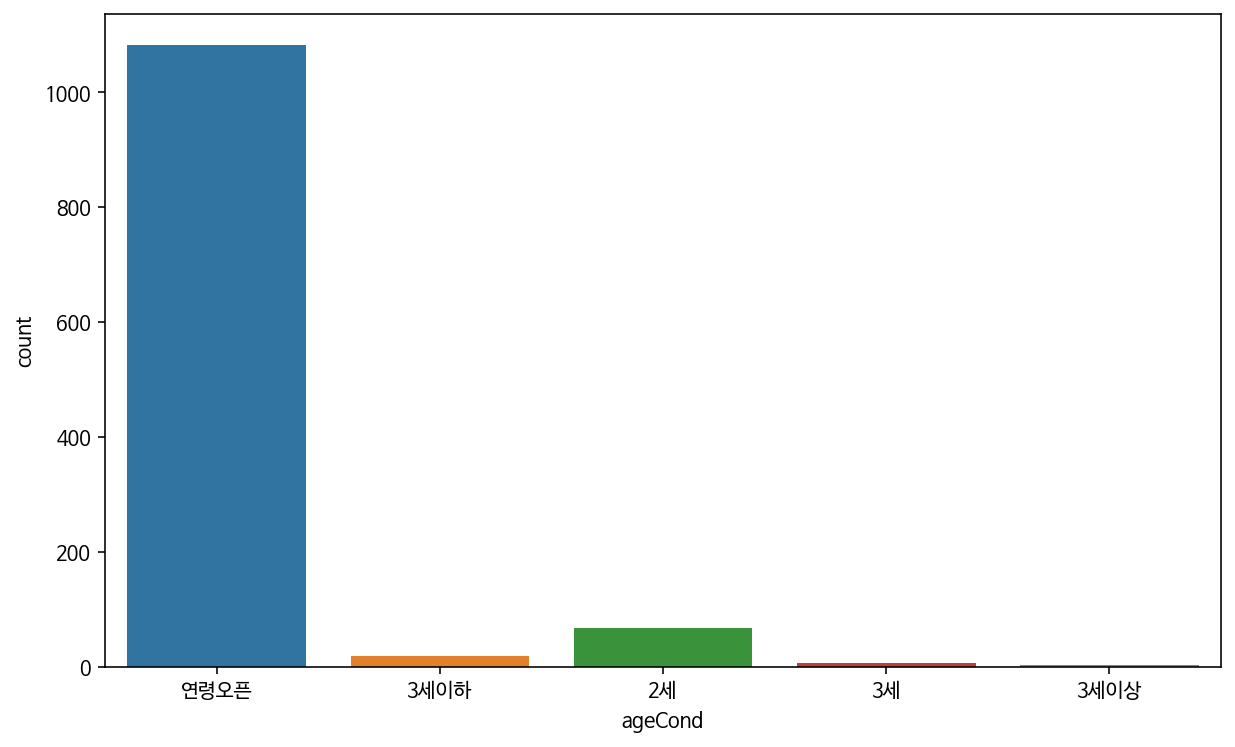

In [17]:
# 경기수가 가장 많은 연령제한
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.countplot(x=winner_df['ageCond'])
plt.show()

- 3세를 기준으로 나뉘어 3세가 출전 가능한 경기가 많다.

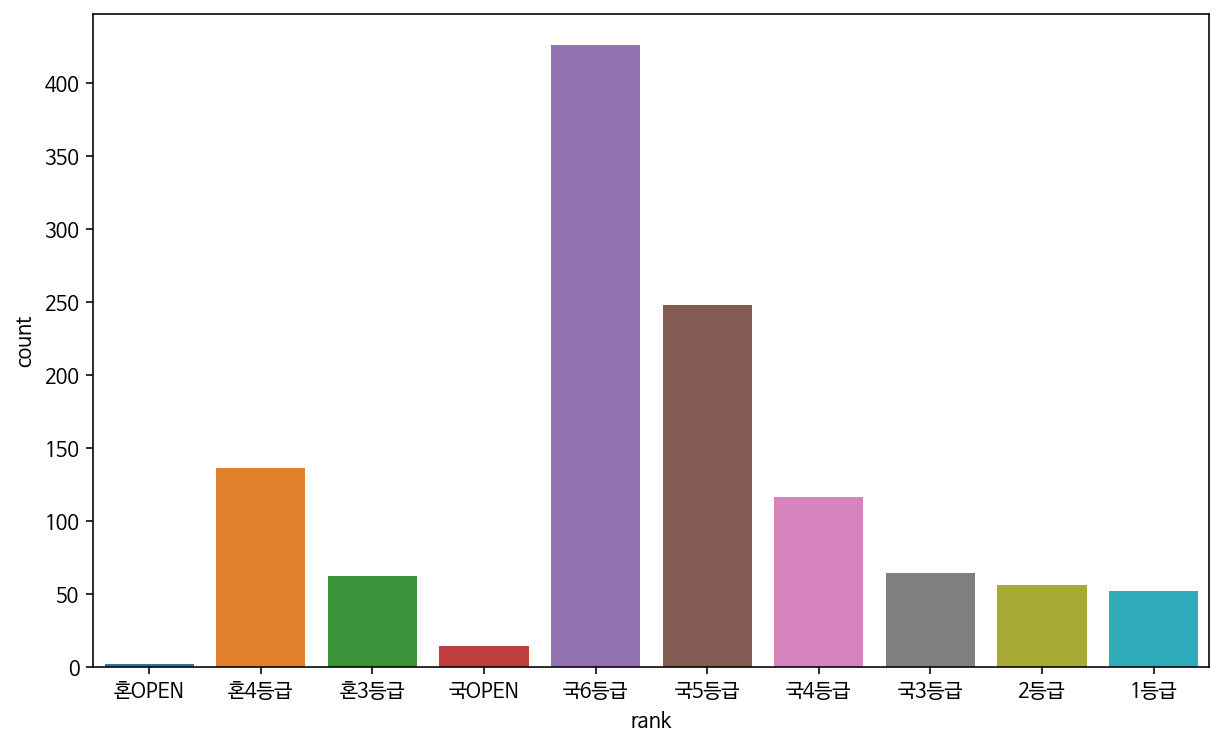

In [18]:
# 1,2 등 말의 등급
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.countplot(x=winner_df['rank'].sort_values(ascending=False))
plt.show()

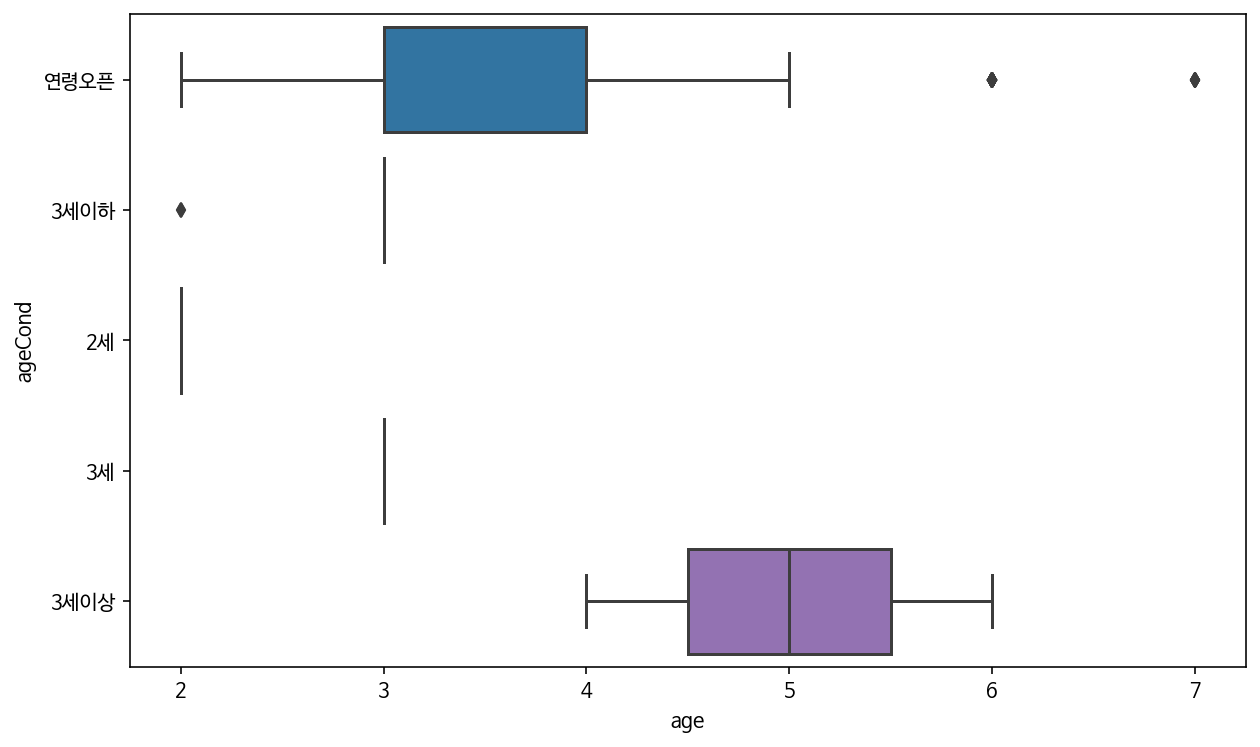

In [19]:
# 연령제한경기별 1,2등 말의 연령
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=winner_df['age'], y=winner_df['ageCond'])
plt.show()

- 3세이상 경기(1경기)에서 4세(1등), 6세 (2등)

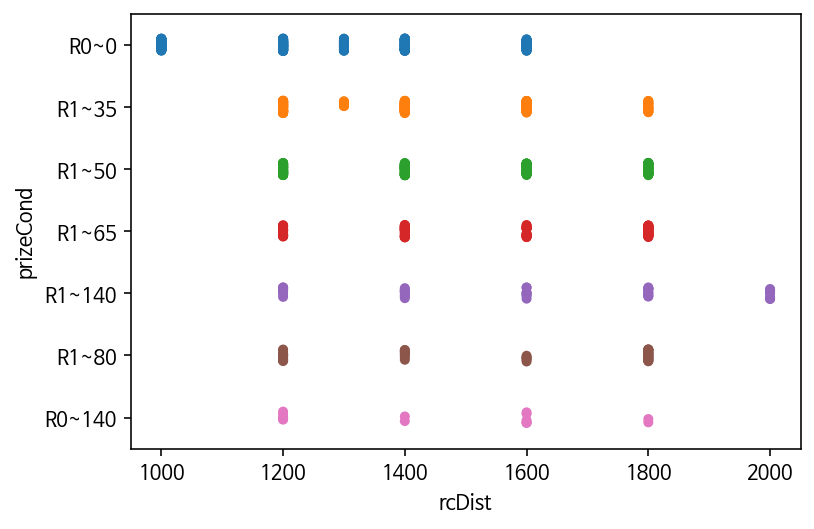

In [20]:
# 경주거리별 상금조건
sns.stripplot(x=winner_df['rcDist'], y=winner_df['prizeCond'])

# 데이터 전처리

# 모델 선별